In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle

from IPython.display import display, HTML

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Never regression Metric
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_pinball_loss
from sklearn.metrics import d2_pinball_score 
from sklearn.metrics import d2_absolute_error_score

from sklearn.model_selection import train_test_split

#### Measuring Metric for Regression
https://scikit-learn.org/stable/modules/model_evaluation.html

In [3]:
#help(kaggle.api.dataset_download_files)

In [4]:
# Modify this path according to your system path : Where you kept ur python notebook file
# MySelf
data = "/Users/sanjayk/Dropbox/Work/Careerera/Final/ML/data/"
#kaggle.api.dataset_download_files("jemishdonda/headbrain", unzip=True,path=data)  

In [ ]:
#downloading the headbrain.csv file
kaggle.api.authenticate()
kaggle.api.dataset_download_files("saarthaksangam/headbrain", unzip=True)   

1. Read the dataset from csv/mysql
2. Display the Size of the dataset
3. Check for Null/Value
4. Put mean with Missing value
5. Check again if any miss value of there
6. if any categorical/nomial variable, we need label encoder
7. Divide the dataset into x_train,y_train,x_test,y_test (training/testing : 80:20,75:25,60:40)
7. Classification / Regression :

In [5]:
df = pd.read_csv(data + 'headbrain.csv')
display(HTML(df.head(10).to_html()))

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [6]:
# default : pearson Correlation metric amoung all features/ columns
df.corr()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
Gender,1.000000,-0.088652,-0.514050,-0.465266
Age Range,-0.088652,1.000000,-0.105428,-0.169438
Head Size(cm^3),-0.514050,-0.105428,1.000000,0.799570
Brain Weight(grams),-0.465266,-0.169438,0.799570,1.000000


In [7]:
print(f'Size of the dataset : {df.shape[0]}')

Size of the dataset : 237


In [8]:
#help(pd.DataFrame.corr)

In [9]:
X = df[['Head Size(cm^3)']].values           # X : Independent Variable (1-n : 1 Minimum)
y = df[['Brain Weight(grams)']].values       # y = Dependent Variable        

Text(0, 0.5, 'Brain Weight')

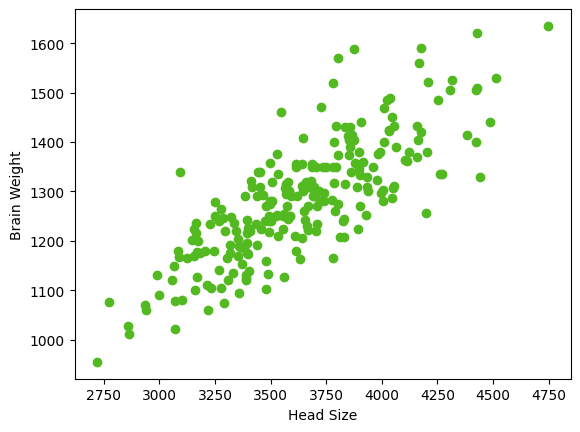

In [10]:
plt.scatter(X,y,color='#52b920')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')

In [11]:
#help(train_test_split)

In [12]:
### Divide the data X, y into xTrain, yTrain, xTest, yTest
xTrain, xTest, yTrain, yTest = train_test_split(X,y,train_size=0.80, test_size=0.20)

In [13]:
# creating an object of LinearRegression Class
model = LinearRegression()

# training of the model(fit) : computes m1,c  : y = m1x +c
model.fit(xTrain, yTrain)

LinearRegression()

In [14]:
model

LinearRegression()

In [15]:
# slope :
model.coef_

array([[0.24742473]])

In [16]:
#intercept
model.intercept_

array([378.82251499])

In [17]:
model.n_features_in_

1

In [18]:
# Predictiong the xTest samples value
yPred = model.predict(xTest)

In [19]:
# Measuring Metric: Regression 
print(f'Root Mean Square Error : {mean_squared_error(yTest, yPred,squared=False):0.3f}')
print(f'Mean Square Error      : {mean_squared_error(yTest, yPred):0.3f}')
print(f'Absolute Square Error  : {mean_absolute_error(yTest, yPred):0.3f}')
print(f'R Square               : {r2_score(yTest,yPred):0.3f}') 

Root Mean Square Error : 80.072
Mean Square Error      : 6411.579
Absolute Square Error  : 65.126
R Square               : 0.645


- Error =  Summation  (abs(YPred - YTest)) => Mean Absolute Error
- Error =  Summation  ((YPred - YTest)^2) => Mean Square Error
- Error =  SQRT(Summation  ((YPred - YTest)^2)) => Root Mean Square Error
- RSquare  =  1 - (Summation of (YPred-yMean) / Summation of (YTest-yMean))

In [20]:
#help(mean_squared_error)
#help(LinearRegression)
#Y = m1x1 + m2x2 + ......

In [21]:
x1 = np.linspace(2500,5000,1000).reshape(-1, 1)
y1 = model.predict(x1)

Text(0, 0.5, 'Brain Weight')

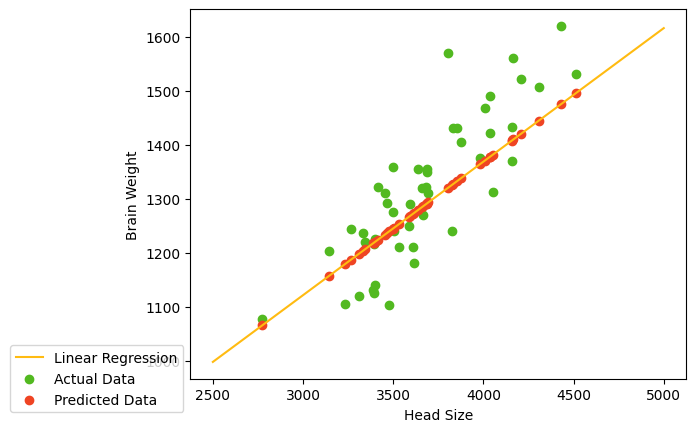

In [22]:
plt.plot(x1,y1,color='#ffbb11', label='Linear Regression')
plt.scatter(xTest,yTest,color='#52b920',label='Actual Data')
plt.scatter(xTest,yPred,color='#ef4423',label='Predicted Data')
plt.legend(loc="center right",bbox_to_anchor=(0.0, 0, 0, 0))
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')

In [ ]:
# Extended Linear Regression

In [19]:
#seed value : each random generator takes different seed value
#if you want to generate the same squence, you need set the same seed value
rng = np.random.RandomState(42)
X = rng.rand(100,3)
y = rng.randint(0,200,100)

In [23]:
X
# Y = M1x1 + M2x2 + M3x2 + c
#model.coef_ : 3 values (m1,m2,m3)
#model.intercept_ : 1 value

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985],
       [0.83244264, 0.21233911, 0.18182497],
       [0.18340451, 0.30424224, 0.52475643],
       [0.43194502, 0.29122914, 0.61185289],
       [0.13949386, 0.29214465, 0.36636184],
       [0.45606998, 0.78517596, 0.19967378],
       [0.51423444, 0.59241457, 0.04645041],
       [0.60754485, 0.17052412, 0.06505159],
       [0.94888554, 0.96563203, 0.80839735],
       [0.30461377, 0.09767211, 0.68423303],
       [0.44015249, 0.12203823, 0.49517691],
       [0.03438852, 0.9093204 , 0.25877998],
       [0.66252228, 0.31171108, 0.52006802],
       [0.54671028, 0.18485446, 0.96958463],
       [0.77513282, 0.93949894, 0.89482735],
       [0.59789998, 0.92187424, 0.0884925 ],
       [0.19598286, 0.04522729, 0.32533033],
       [0.38867729, 0.27134903, 0.82873751],
       [0.35675333, 0.28093451, 0.54269608],
       [0.

In [24]:
y

array([108, 115,  93,  46,  98,  54, 167,  51, 143,  12, 113, 123, 105,
       157, 146, 144, 119,  62,  18,  91,  57, 182,  89, 116,  61,  22,
       126, 136, 139, 128,  57, 121,   0,  33,  95, 125, 117,  47,  88,
       116, 128,  15, 188, 191, 190,  68,  21,  92, 194,  75, 153, 143,
       178,  85, 184,  28,  68,  46,  93, 189, 196, 143, 175,  84,  38,
        99,  32, 100,  22,   9,  68,  99,  33, 179, 137, 146, 185,  95,
         0,  68,   3,  15,  23,  79,   1, 127, 159,  83, 151, 139, 177,
       162, 123,  32, 160, 188, 178, 170, 100,  11])

In [25]:
clf = LinearRegression()

In [26]:
clf.fit(X,y)

LinearRegression()

In [28]:
clf.coef_

array([12.05908162, -4.12768786,  5.24442794])

In [29]:
clf.intercept_

95.14209041597026